<div align="left"><a href="./pythonterm4.ipynb"> page précédente </a></div>

<h1 style="text-align:center;"> Tracer, à l’aide d’un langage de programmation, le diagramme de distribution des espèces d’un couple acide-base de pKa donné.</h1>

Pour tracer le diagramme de diqstribution d'un couple acide base, on peut utiliser la relation:
$$pH = pKa + log \frac{[Base]}{[Acide]}$$

On utilise la fonction log10 de la bibliothèque math qui correspond au logarithme décimal. Une fonction log existe aussi pour laquelle il faut préciser la base utilisée en deuxième argument faute de quoi il utilise le logarithme népérien. Ainsi log10(100) renvoie le même résultat que log(100,10).

De plus on sait que $[Base] + [Acide] = constante$ valeur que l'on peut fixer à 100 pour accéder plus facilement à des pourcentages.


Par conservation des espèces on a donc $[Base] = x$ et $[Acide] = 100 - x$ par exemple. Attention, il s'agit d'un équilibre on aura donc $x \ne 0$ et $x \ne 100$.

On peut ainsi balayer x avec $0 < x < 100$ connaissant le pKa du couple et calculer le pH correspondant afin de tracer le diagramme de répartition.



In [2]:
import matplotlib.pyplot as plt
from math import log10

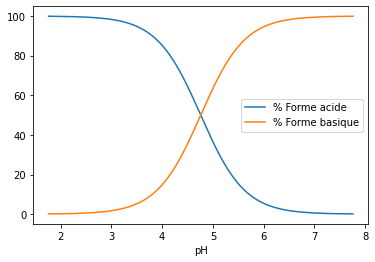

In [2]:
# paramètre de la simulation
pKa = 4.76

# Initialisation
pH = []
acide = []
base = []

# Simulation pour 999 valeurs de x entre 0 et 100
dx = 0.1
for i in range(1,1000):# élimine les cas i = 0 et i = 1000 qui posent problème
    x = i * dx
    acide.append(100 - x)
    base.append(x)
    pH.append(pKa + log10(base[-1]/acide[-1]))
    
# Affichage du résultat    
plt.plot(pH,acide, label = "% Forme acide")
plt.plot(pH,base, label = "% Forme basique")
plt.xlabel("pH")
plt.legend()
plt.show()

# Exercice
1. Modifier le programme précédent afin de simuler l'équilibre entre l'ion ammonium $NH_4^{+}$ et l'ammoniac $NH_3$. Le pKa du couple considéré est de 9,25.

In [ ]:
# question 1


On peut aussi balayer le pH entre 0 et 14. On peut donc pour chaque pas fixer la concentration en oxonium $[H_3O^{+}]$. 


Comme $K_a = \frac{[CH_3COO^{-}] [H_3O^{+}]}{[CH_3COOH]}$ on a une relation entre les concentration en acide et en base conjuguée $[CH_3COOH] = [CH_3COO^{-}] \times \frac{[H_3O^{+}]}{K_a}$.


Enfin, on peut comme tout à l'heure fixer la somme $[CH_3COOH] + [CH_3COO^{-}] = 100$.


En notant $h$ la concentration en ion oxonium et $a$ la concentration en ion éthanoate, on obtient:
$$ \ $$
$ a \times \left( \frac{h}{K_a} + 1 \right) = 100 \Leftrightarrow a = \frac{100}{1 + \frac{h}{K_a}}$ que l'on peut calculer à partir de h. On peut ensuite calculer la concentration en acide conjugué avec $[CH_3COOH] = a \times \frac{ h}{K_a}$  ou $[CH_3COOH] = 100 - a$ puis tracer la répartition.

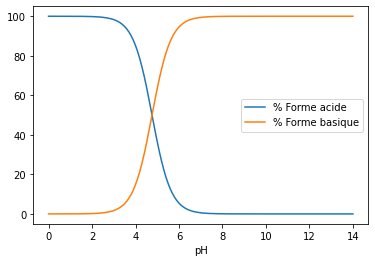

In [4]:
# paramètre de la simulation
pKa = 4.76
Ka = 10**(-pKa)

# Initialisation
pH = []
acide = []
base = []

# Simulation pour un pH entre 0 et 14.
dpH = 0.1
for i in range(0,141):
    pH.append(i*dpH)
    h = 10**(-pH[-1])
    a = 100 / (1 + h/Ka)
    base.append(a)
    acide.append(a*h/Ka)
    
# Affichage du résultat    
plt.plot(pH, acide, label = "% Forme acide")
plt.plot(pH, base, label = "% Forme basique")
plt.xlabel("pH")
plt.legend()
plt.show()

# Exercice
2. Modifier le programme précédent afin de simuler l'équilibre entre l'acide méthanoïque  $HCOOH$ et l'ion méthanoate $HCOO^{-}$. Le pKa du couple considéré est de 3,7. Modifier ensuite le programme afin d'utiliser la relation $[HCOOH] = 100 - a$ et comparer les deux résultats obtenus.

In [ ]:
# question 2


Si on utilise la même méthode pour un diacide on obtient pour chaque pas:
* On peut fixer la concentration en oxonium $h = [H_3O^{+}]$. 
* $K_{a_1} = \frac{[AH^{-}] [H_3O^{+}]}{[AH_2]}$ et $K_{a_2} = \frac{[A^{2-}] [H_3O^{+}]}{[AH^{-}]}$. Ainsi si on note $a = [A^{2-}]$, on a aussi $[AH^{-}] = a \frac{h}{K_{a_2}}$ et $[AH_2] = a \frac{h^2}{K_{a_2} K_{a_1}}$.

* Enfin, on peut comme tout à l'heure fixer la somme $[A^{2-}] + [AH^{-}] + [AH_2] = 100$ et donc obtenir une expression permettant de calculer $a$ une fois que $h$ est fixé.


$$ a = \frac{100}{1 + \frac{h}{K_{a_2}} + \frac{h^2}{K_{a_2} K_{a_1}}}$$

Cette méthode est généralisable à tous les polyacides.
$$ \ $$

Ci-dessous est présentée la simulation pour l'acide tartrique $HOOC-CHOH-CHOH-COOH$ dont les pKa successifs sont de 3,04 et 4,37.

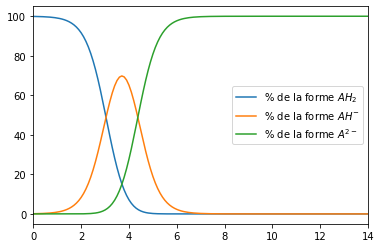

In [30]:
# Paramètres de la simulation
pKa = [3.04, 4.37]

# Calcul des Ka correspondants
Ka = []
for val in pKa:
    Ka.append(10**(-val))
    
# Initialisation
dpH = 0.1
pH = []
liste_C = [[], [], []]

# Simulation
for i in range(0, 141):
    pH.append(i*dpH)
    h = 10**(-pH[-1])
    a = 100 / (1 + h/Ka[1] + h**2/(Ka[0]*Ka[1]))
    liste_C[2].append(a)
    liste_C[1].append(a*h/Ka[1])
    liste_C[0].append(a*h**2/(Ka[1]*Ka[0]))
    
# Affichage
plt.plot(pH,liste_C[0], label=r"% de la forme $AH_2$")
plt.plot(pH,liste_C[1], label=r"% de la forme $AH^{-}$")
plt.plot(pH,liste_C[2], label=r"% de la forme $A^{2-}$")
plt.xlim([0,14])
plt.xlabel='pH'
plt.legend()
plt.show()

# Exercice
3. Copier puis modifier le programme précédent afin de simuler le comportement de l'acide sulfurique (pKa de -3.0 et +1.9). A quoi voit-on que la première acidité est forte ?
4. Copier puis modifier le programme précédent afin de simuler le comportement de l'acide phosphorique $H_3PO_4$, triacide dont les pKa successifs sont de 2.15, 7,20 et 12,32. Attention, il s'agit d'un triacide, la mise en équation devra donc être retravaillée avant de passer à la programmation.

In [ ]:
# question 3


In [32]:
# question 4


On peut aussi travailler sur la notion d'équilibre, d'avancement et de quotient réactionnel. Pour cela, on prend les équilibres un par un et on fait évoluer l'avancement jusqu'à atteindre Q = K. La conservation des éléments se fait en initialisant la forme $AH_n$ à 100 et les autres à zéro puis en ne réalisant que des transformation d'un acide en sa base conjuguée par petits pas. On balaye ainsi tous les équilibres plusieurs fois jusqu'à ce qu'il n'y ait plus de modification des quantités de chaque espèce.


L'exemple ci-dessous est celui de l'EDTA noté $H_4Y$

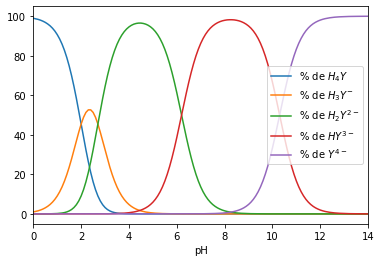

In [5]:
# Paramètres de la simulation
pKa = [2.0, 2.7, 6.2, 10.3]
especes = [r"$H_4Y$",r"$H_3Y^{-}$",r"$H_2Y^{2-}$",r"$HY^{3-}$",r"$Y^{4-}$"]
Ka = []
for val in pKa:
    Ka.append(10**(-val))
n = len(pKa) # nombre d'équilibres

# Pas pour l'avancement et le pH
dx = 0.01
dpH = 0.1

# Initialisation de la liste des valeurs de pH 
pH = []
for i in range(0, 141):
    pH.append(i*dpH)
    
# Initialisation des listes des valeurs de concentration des différentes espèces
formes = []
temp = []
for i in range(len(pH)):
    temp.append(100) # On part de [AHn] = 100 pour chaque valeur de pH 
formes.append(temp[:])
temp = []
for j in range(len(pH)):
    temp.append(0) # et 0 pour toutes les autres espèces
for i in range(len(pKa)):    
    formes.append(temp[:])

#Simulation
for i in range(len(pH)): # On a un point pour chaque valeur de pH
    h = 10**(-pH[i]) # On calcule la concentration en H3O+ correspondante.
    modifie = True
    while modifie == True: # On balaye tant qu'il y a des modifications
        modifie = False
        for j in range(n): # On balaye tous les équilibres
            while formes[j][i] > 0 and formes[j][i] > formes[j+1][i] * h / Ka[j] : # Si Q < K, l'avancement augmenteif
                formes[j][i] -=dx
                formes[j+1][i] +=dx
                modifie = True # S'il y a eu une modification, on l'indique
                
# Affichage                
for j in range(n+1):
    plt.plot(pH,formes[j],label = "% de {}".format(especes[j]))
plt.xlabel("pH")
plt.xlim([0,14])
plt.legend()
plt.show()

Il est également possible de simuler une courbe de titrage acide-base phmétrique. Ci-dessous l'exemple du titrage de l'acide chlorhydrique par la soude. On balaye tous les volumes de soude versés par petits pas et pour chacun on détermine le pH de la solution d'$H_3O^{+}$ ou de la solution d'$HO^{-}$ correspondante. Enfin on trace la courbe obtenue et éventuellement la courbe dérivée si besoin.

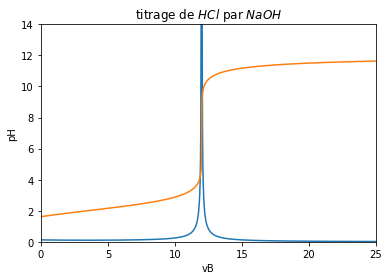

In [24]:
# Paramètres de la simulation    
cb = 0.01 # mol/L
va = 5.0 # mL
veq = 12.0 # mL
vb_max = 25.0 # mL

# Calcul de la concentration de la slution titrée
ca = cb*veq / va

# Initialisation et simulation
n = 1000 # nombre de points
pH = []
vb = []
dv = vb_max/(n-1)
for i in range(n):
    vb.append(i*dv)
    if vb[-1] < veq:
        pH.append(-log10((ca*va-cb*vb[-1])/(va+vb[-1])))
    elif vb[-1] == veq:
        pH.append(7)
    else:
        pH.append(14+log10((cb*vb[-1]-ca*va)/(va+vb[-1])))
        

# calcul et affichage de la courbe dérivée si besoin
derivee = []
for i in range(1,n-1):
    derivee.append((pH[i+1]-pH[i-1])/(vb[i+1]-vb[i-1]))
plt.plot(vb[1:-1],derivee)

# affichage
plt.plot(vb,pH)
plt.xlim([0,vb_max])
plt.ylim([0,14])
plt.xlabel("vB")
plt.ylabel("pH")
plt.title("titrage de $HCl$ par $NaOH$")
plt.show()

# Exercice
5. Copier puis modifier le programme précédent afin de simuler le titrage de 10 mL de soude par de l'acide chlorhydrique à 0.1 mol/L à l'aide d'une burette de 20 mL. Le volume équivalent sera fixé à 8 mL.

In [ ]:
# question 5


Pour la simulation du titrage d'un acide faible ou d'une base faible, ceci est plus dificile en terme de mise en équation et donc difficilement réalisable par un élève. Cependant, il est possible de donner un tel code python à l'élève et de le laisser modifier les paramètres d'entrée de la simulation. Ce code peut également servir à construire des courbes afin d'illustrer le cours ou répondre rapidement à une question d'élève en choisissant les paramètres adaptés.


Nous utiliserons ici l'exemple du titrage de l'acide éthanoïque par la soude. La mise en équation se fait grâce à 
* la conservation de la charge électrique:
$$[Na^{+}] + [H_3O^{+}] = [HO^{-}] + [CH_3COO^{-}]$$
* l'équilibre d'autoprotolyse de l'eau:
$$ [HO^{-}][H_3O^{+}] = K_e = 10^{-14}$$
* l'équilibre entre $CH_3COOH$ et $CH_3COO^{-}$:
$$ K_a = \frac{[CH_3COO^{-}][H_3O^{+}]}{[CH_3COOH]\ C^0}$$
* la conservation des espèces dans un couple acide/base:
$$[CH_3COOH] + [CH_3COO^{-}] = cte = [CH_3COOH]_i$$

$$ \ $$

Si on note $h$ la concentration en oxonium $[H_3O^{+}]$, $V_a$ le volume de solution d'acide titré et $C_a$ sa concentration, $V_b$ le volume de solution de soude ajouté et $C_b$ sa concentration, on obtient l'équation:
$$V_b = \frac{V_a}{C_b + h - \frac{K_e}{h}}\left(\frac{K_e}{h} - h + \frac{1}{1 + \frac{h}{K_a}} C_a\right)$$

$$ \ $$
Il suffit donc de balayer les différentes valeurs de pH donc de $h$
et de calculer les valeurs de $V_b$ correspondantes afin d'obtenir la courbe souhaitée.

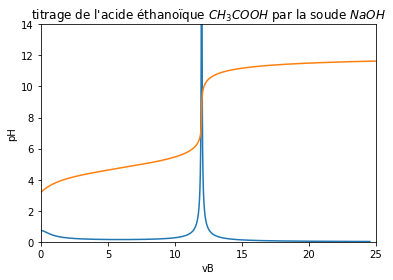

In [25]:
# Fonction permettant de calculer Vb d'après la formule théorique ci-dessus
def v_b(pKa,ca,va,cb,ph):
    Ke = 1.0e-14
    Ka = 10**(-pKa)
    h = 10**(-ph)
    vb = va*(Ke/h - h + ca/(1+h/Ka))/(cb+h-Ke/h)
    return vb

# Paramètres de la simulation    
pKa = 4.76
cb = 0.01 # mol/L
va = 5.0 # mL
veq = 12.0 # mL
vb_max = 25.0 # mL

# Calcul de la concentration de la slution titrée
ca = cb*veq / va

# Calcul de la valeur maxi de pH lorsque la burette a été vidée
ph_max = 14+log10((vb_max*cb-ca*va)/(vb_max+va))
ph_min = 0.5*pKa-0.5*log10(ca)

# Initialisation et simulation
n = 1000 # nombre de points
pH = []
vb = []
dph = (ph_max-ph_min)/(n-1) # pas de pH afin d'aller de ph_min à ph_max en n pas
for i in range(n):
    pH.append(ph_min+dph*i)
    vb.append(v_b(pKa,ca,va,cb,pH[-1]))

# calcul et affichage de la courbe dérivée si besoin
derivee = []
for i in range(1,n-1):
    derivee.append((pH[i+1]-pH[i-1])/(vb[i+1]-vb[i-1]))
plt.plot(vb[1:-1],derivee)

# affichage
plt.plot(vb,pH)
plt.xlim([0,vb_max])
plt.ylim([0,14])
plt.xlabel("vB")
plt.ylabel("pH")
plt.title("titrage de l'acide éthanoïque $CH_3COOH$ par la soude $NaOH$")
plt.show()
            

Ce code est une version simplifiée (monoacide) et sans utilisation de la bibliothèque numpy de ce que l'on peut trouver à l'adresse https://www.f-legrand.fr/scidoc/docimg/sciphys/chimieanalyt/dosagepolyacide/dosagepolyacide.html

# Exercice
6. Copier puis modifier le programme précédent afin de supprimer le calcul et le tracé de la dérivée, et d'obtenir un affichage uniquement de la zone pour laquelle 10 mL <= Vb <= 15 mL et 4 <= pH <= 12.

In [28]:
# question 6
